# **Mount the google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing all the libraries**

In [ ]:

import joblib
import pandas as pd
from math import sqrt;
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression;
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, mean_absolute_error, mean_squared_error, f1_score, log_loss
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd

In [ ]:
!ls /content/drive/MyDrive/ML_Cybersec-Lab01/

'Data Preprocessing and Feature Selection.ipynb'  'malware_detection_data (1).csv'
 dynamic_100.py					   malware_detection_data.csv
 dynamic.py					  'NYU Malware Homework-1'
 logistics_regression_classifier.joblib		   random_forest_model_100.joblib
 logistics_regression_classifier.pkl		   random_forest_model.pkl
 malware_classifier.joblib


# **Data Preprocessing and Feature Engineering**

In [ ]:
#read csv
df=pd.read_csv('/content/drive/MyDrive/ML_Cybersec-Lab01/malware_detection_data.csv')

In [ ]:
df.head()

,file_type,file_size,sha256,score,duration,udp_count,tcp_count,icmp_count,dlls_loaded_count,reg_keys_opened_count,virustotal_detection_count,label
0,"PE32 executable (GUI) Intel 80386, for MS Windows",9154048,57abb6c8dc128788e89c244b5a27e60d5b06b670d3d125...,0.0,27,6,0,0,18,0,0,0
1,"PE32 executable (GUI) Intel 80386, for MS Windows",331200,ab97716659b073854b43e1531e38106894fc96c01bebf2...,0.0,13,8,0,0,1,1,0,0
2,"PE32 executable (GUI) Intel 80386, for MS Wind...",603576,b2b8f305a72faa40b2a86998e8682c23b054809f09bc12...,3.8,23,6,0,0,46,37,0,0
3,"PE32 executable (GUI) Intel 80386, for MS Wind...",1628400,9c19ed4a1044b26819dac39f4f637fbc490fb7331ca50f...,0.8,14,8,0,0,22,284,0,0
4,"PE32 executable (GUI) Intel 80386, for MS Wind...",661808,1dc6610571d525aa3df180eb4550273ef542250361cefc...,0.8,16,8,0,0,86,648,0,0


In [ ]:
# Isolating independent and dependent variables for training dataset
y = df['label']
x=df.drop(['label','file_type','sha256','virustotal_detection_count','tcp_count','icmp_count','udp_count'],axis=1)

# Splitting datasets into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
x_train.head()

,file_size,score,duration,dlls_loaded_count,reg_keys_opened_count
6498,648896,4.0,22,5,2
2356,3968440,0.2,14,6,0
2822,1708378,0.0,23,15,185
6412,648784,2.4,26,5,2
7521,705501,2.4,22,16,282


# **Random Classifier Model**

In [ ]:
# Training random forest classifier
rf_clf = RandomForestClassifier(max_depth=100)
rf_clf.fit(x_train, y_train)
rf_prediction = rf_clf.predict(x_test)
conf_m = confusion_matrix(y_test, rf_prediction)
print(conf_m)
print('Random Forest Classifier Accuracy score: ', accuracy_score(y_test, rf_prediction))



[[1001    4]
 [   4  999]]
Random Forest Classifier Accuracy score:  0.9960159362549801


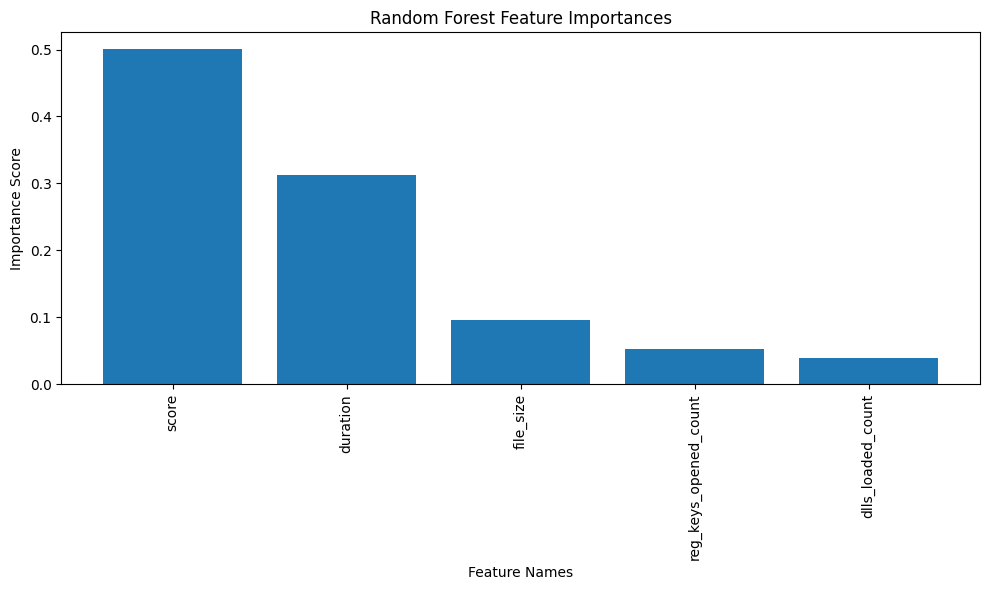

In [ ]:
#Function to plot most important features of random forest model
import numpy as np

# Get feature importances from the trained random forest classifier
importances = rf_clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a bar chart to display the feature importances
plt.pyplot.figure(figsize=(10, 6))
plt.pyplot.title("Random Forest Feature Importances")
plt.pyplot.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.pyplot.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.pyplot.xlabel('Feature Names')
plt.pyplot.ylabel('Importance Score')
plt.pyplot.tight_layout()
plt.pyplot.show()


# **Logistic Regression Model**

In [ ]:
# Training Logistics Regression classifier
lm = LogisticRegression(max_iter=2000)
lm.fit(x_train,y_train)
predictions = lm.predict(x_test)
rms = sqrt(mean_squared_error(y_test, predictions))
print('Mean Absolute Error: ', mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error: ',rms)
print('R Squared Score: ', r2_score(y_test, predictions))
print('Accuracy score: ', accuracy_score(predictions, y_test))

Mean Absolute Error:  0.018924302788844622
Root Mean Squared Error:  0.13756563084159001
R Squared Score:  0.9243027137492994
Accuracy score:  0.9810756972111554


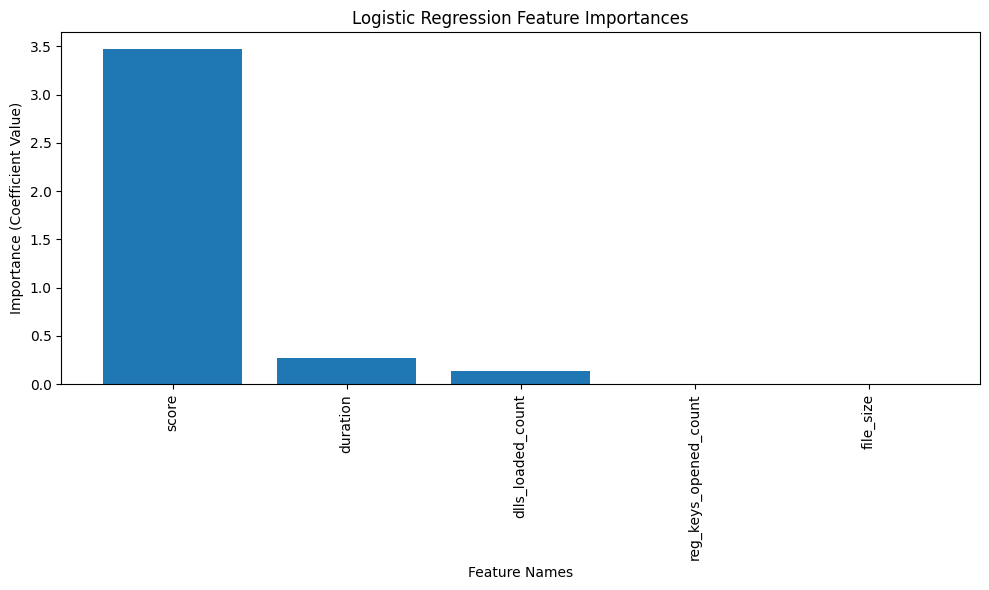

In [ ]:
import numpy as np

# Get the coefficients (importance) from the trained logistic regression model
importance = np.abs(lm.coef_[0])

# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]

# Create a bar chart to display the feature importances
plt.pyplot.figure(figsize=(10, 6))
plt.pyplot.title("Logistic Regression Feature Importances")
plt.pyplot.bar(range(x_train.shape[1]), importance[indices], align="center")
plt.pyplot.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.pyplot.xlabel('Feature Names')
plt.pyplot.ylabel('Importance (Coefficient Value)')
plt.pyplot.tight_layout()
plt.pyplot.show()

# **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model= GradientBoostingClassifier(n_estimators=50)
GB_model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50)

In [ ]:
# Gradient Boosting
GB_yhat = GB_model.predict(x_test)
print("GB F1-score: %.6f" % f1_score(y_test, GB_yhat, average='weighted'))
print("Accuracy of Gradient Boosting classifier is %.6f:", GB_model.score(x_test,y_test))

GB F1-score: 0.993028
Accuracy of Gradient Boosting classifier is %.6f: 0.9930278884462151


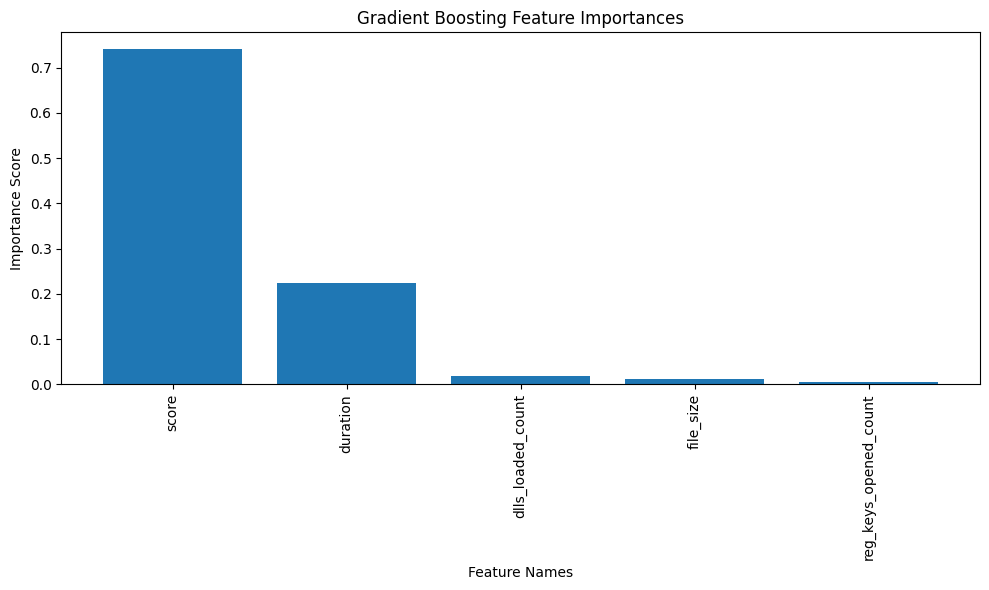

In [ ]:
import numpy as np

# Get feature importance from the Gradient Boosting model
importance = GB_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]

# Create a bar chart to display the feature importances
plt.pyplot.figure(figsize=(10, 6))
plt.pyplot.title("Gradient Boosting Feature Importances")
plt.pyplot.bar(range(x_train.shape[1]), importance[indices], align="center")
plt.pyplot.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.pyplot.xlabel('Feature Names')
plt.pyplot.ylabel('Importance Score')
plt.pyplot.tight_layout()
plt.pyplot.show()

# **Saving The Model**

In [ ]:
#Saving the random forest and logistics regression models
joblib.dump(rf_clf, 'random_forest_model.joblib')
joblib.dump(lm, 'logistics_regression_classifier.joblib')
joblib.dump(GB_model,'Gradient_boosting_classifier.joblib')

['Gradient_boosting_classifier.joblib']

In [ ]:
# Load the model from the file
rf_from_joblib = joblib.load('random_forest_model.joblib')

# Use the loaded model to make predictions
results = rf_from_joblib.predict(x_test)

print('Random Forest Classifier Accuracy score: ', accuracy_score(y_test, results))

Random Forest Classifier Accuracy score:  0.9960159362549801


# **Random Forest with 100 Accuracy**

In [ ]:
df.head()

,file_type,file_size,sha256,score,duration,udp_count,tcp_count,icmp_count,dlls_loaded_count,reg_keys_opened_count,virustotal_detection_count,label
0,"PE32 executable (GUI) Intel 80386, for MS Windows",9154048,57abb6c8dc128788e89c244b5a27e60d5b06b670d3d125...,0.0,27,6,0,0,18,0,0,0
1,"PE32 executable (GUI) Intel 80386, for MS Windows",331200,ab97716659b073854b43e1531e38106894fc96c01bebf2...,0.0,13,8,0,0,1,1,0,0
2,"PE32 executable (GUI) Intel 80386, for MS Wind...",603576,b2b8f305a72faa40b2a86998e8682c23b054809f09bc12...,3.8,23,6,0,0,46,37,0,0
3,"PE32 executable (GUI) Intel 80386, for MS Wind...",1628400,9c19ed4a1044b26819dac39f4f637fbc490fb7331ca50f...,0.8,14,8,0,0,22,284,0,0
4,"PE32 executable (GUI) Intel 80386, for MS Wind...",661808,1dc6610571d525aa3df180eb4550273ef542250361cefc...,0.8,16,8,0,0,86,648,0,0


In [ ]:
# Isolating independent and dependent variables for training dataset
y_100 = df['label']
x_100=df.drop(['label','file_type','sha256','virustotal_detection_count'],axis=1)

# Splitting datasets into training and test data
x_train_100, x_test_100, y_train_100, y_test_100 = train_test_split(x_100, y_100, test_size=0.2, random_state=42,stratify=y)

In [ ]:
x_train_100.head()

,file_size,score,duration,udp_count,tcp_count,icmp_count,dlls_loaded_count,reg_keys_opened_count
6498,648896,4.0,22,43,9,2,5,2
2356,3968440,0.2,14,8,0,0,6,0
2822,1708378,0.0,23,6,0,0,15,185
6412,648784,2.4,26,41,6,2,5,2
7521,705501,2.4,22,41,7,2,16,282


In [ ]:
# Training random forest classifier
rf_clf_100 = RandomForestClassifier(max_depth=100)
rf_clf_100.fit(x_train_100, y_train_100)
rf_prediction_100 = rf_clf_100.predict(x_test_100)
conf_m_100 = confusion_matrix(y_test_100, rf_prediction_100)
print(conf_m_100)
print('Random Forest Classifier Accuracy score: ', accuracy_score(y_test_100, rf_prediction_100))

[[1005    0]
 [   0 1003]]
Random Forest Classifier Accuracy score:  1.0


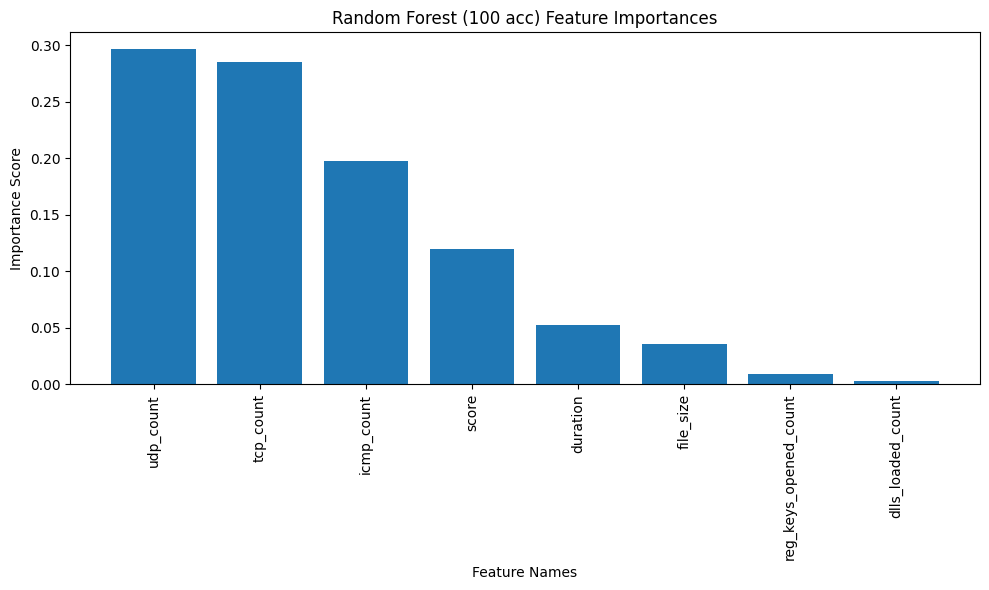

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the Random Forest model
importance = rf_clf_100.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]

# Create a bar chart to display the feature importances
plt.figure(figsize=(10, 6))
plt.title("Random Forest (100 acc) Feature Importances")
plt.bar(range(x_train_100.shape[1]), importance[indices], align="center")
plt.xticks(range(x_train_100.shape[1]), x_train_100.columns[indices], rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(rf_clf_100, 'random_forest_model_100.joblib')

['random_forest_model_100.joblib']

In [ ]:
# Load the model from the file
rf_from_joblib_100 = joblib.load('random_forest_model_100.joblib')
# Use the loaded model to make predictions
results_100 = rf_from_joblib_100.predict(x_test_100)

print('Random Forest Classifier 100 Accuracy score: ', accuracy_score(y_test_100, results_100))

Random Forest Classifier 100 Accuracy score:  1.0
